# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
# rename the columns
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [4]:
#  check NaN term in 'ENROLL_ALL' and 'ENROLL_ALL_EST' with sum of 'ENROLL_PREK', 'ENROLL_KINDER', 'ENROLL_PRIMARY' and 'ENROLL_HS'
((df["ENROLL_ALL"] - df["ENROLL_PREK"] - df["ENROLL_KINDER"] - df["ENROLL_PRIMARY"] - df["ENROLL_HS"]) / df["ENROLL_ALL"]*100).describe()

count    1012.000000
mean        0.523796
std         1.225569
min         0.000000
25%         0.000000
50%         0.000000
75%         0.297826
max         7.892933
dtype: float64

We find that in most cases, df["ENROLL_ALL"] = df["ENROLL_PREK"] - df["ENROLL_KINDER"] - df["ENROLL_PRIMARY"] - df["ENROLL_HS"]. Therefore we decide to replace NaN term in "ENROLL_ALL" with sum of 'ENROLL_PREK', 'ENROLL_KINDER', 'ENROLL_PRIMARY' and 'ENROLL_HS'.

In [5]:
# fill up NaN term in "ENROLL_ALL"
df["ENROLL_ALL"].fillna( df["ENROLL_PREK"] + df["ENROLL_KINDER"] + df["ENROLL_PRIMARY"] + df["ENROLL_HS"], inplace=True)

In [6]:
# check remaining NaN term in "ENROLL_ALL"
df["ENROLL_ALL"].isna().sum()

83

In [7]:
# check if there is any possible "ENROLL_ALL_EST" term that can fill up remaining NaN term in "ENROLL_ALL"
df[df["ENROLL_ALL"].isna()]["ENROLL_ALL_EST"].notna().sum()

0

Therefore, we cannot fill up the remaining NaN term in "ENROLL_ALL" with "ENROLL_ALL_EST"

Then we check whether there are any NaN terms in Grade 8 Math

In [8]:
# check whether there are any NaN terms in Grade 8 Math
df["AVG_MATH_8_SCORE"].isna().sum()

1113

Since NaN term takes majority in  "AVG_MATH_8_SCORE" term, we drop off those corresponding rows.

In [9]:
df.dropna(subset="AVG_MATH_8_SCORE", inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: AVG_MATH_8_SCORE

How many years of data are logged in our dataset? 

In [10]:
year = df.groupby("YEAR")
year.count()

,PRIMARY_KEY,STATE,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
YEAR,,,,,,,,,,,,,,,,,,,,,
1990,39,39,0,0,0,0,0,0,0,0,...,38,38,38,0,0,38,1,39,0,0
1992,43,43,0,42,42,42,42,42,42,42,...,42,42,42,0,0,42,43,43,43,1
1996,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2000,42,42,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,42,42,1,0
2003,53,53,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,53,53,53,53
2005,53,53,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,53,53,53,53
2007,53,53,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,53,53,53,53
2009,53,53,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,53,53,53,53
2011,53,53,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,53,53,53,53


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

Since there is NaN in "ENROLL_4" and "ENROLL_8", we fill them up with median of corresponding column

In [11]:
df["ENROLL_4"].fillna(df["ENROLL_4"].median(), inplace=True)
df["ENROLL_8"].fillna(df["ENROLL_8"].median(), inplace= True)


In [12]:
df["AVG_OVERALL_SCORE"] = ((df["AVG_MATH_4_SCORE"]+df["AVG_READING_4_SCORE"])*df["ENROLL_4"]  + (df["AVG_MATH_8_SCORE"] + df["AVG_READING_8_SCORE"])* df["ENROLL_8"])/(df["ENROLL_4"]+df["ENROLL_8"])
state = df.groupby("STATE")
state["AVG_OVERALL_SCORE"].mean()["MICHIGAN"] > state["AVG_OVERALL_SCORE"].mean()["OHIO"]

False

It turns out that OHIO has higher average outcome score across all years.

Find the average for your outcome score across all states in 2019

In [13]:
df_ = df[df["YEAR"]==2019]
df_["AVG_OVERALL_SCORE"].mean()

501.3018135046016

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [14]:
df.groupby("STATE")["AVG_OVERALL_SCORE"].max()

STATE
ALABAMA                 489.995127
ALASKA                  497.751820
ARIZONA                 498.816168
ARKANSAS                499.688124
CALIFORNIA              493.903417
COLORADO                516.723453
CONNECTICUT             518.266445
DELAWARE                509.833918
DISTRICT_OF_COLUMBIA    483.599445
DODEA                   528.002168
FLORIDA                 509.213313
GEORGIA                 503.309281
HAWAII                  497.158428
IDAHO                   508.002168
ILLINOIS                505.275097
INDIANA                 516.514113
IOWA                    512.362981
KANSAS                  515.115119
KENTUCKY                508.563365
LOUISIANA               485.879896
MAINE                   515.171662
MARYLAND                518.236761
MASSACHUSETTS           532.690602
MICHIGAN                501.200101
MINNESOTA               522.633979
MISSISSIPPI             494.599445
MISSOURI                508.579906
MONTANA                 517.576655
NATIONAL      

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [15]:
# create column of expenditure spent per student
df.dropna(subset=["INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE"], inplace=True)
df["INSTRUCTION_EXPENDITURE_PER_STUDENT"] = (df["INSTRUCTION_EXPENDITURE"]/df["ENROLL_ALL"])
df["SUPPORT_EXPENDITURE_PER_STUDENT"] = (df["SUPPORT_SERVICES_EXPENDITURE"]/df["ENROLL_ALL"])

Feature engineering justification: The assumption that we made is that the math score of 8th student has a positive relationship with the instruction services expenditure and support services expenditure. Since the number of students in different states varies, we modify into instruction expenditure per student and support services expenditure per student. 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Distribution of 8th Grade Math Scores**

<AxesSubplot:title={'center':'Distribution of 8th Grade Math Scores'}, ylabel='Frequency'>

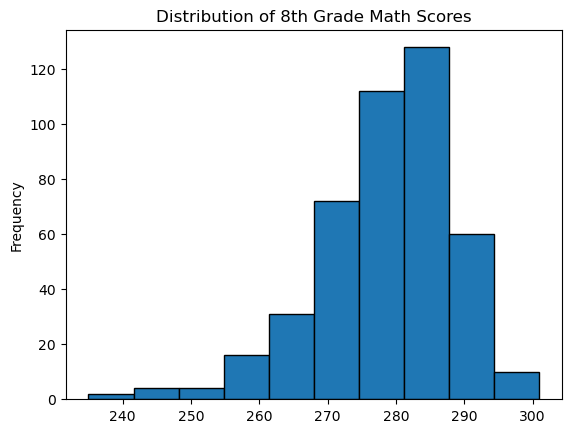

In [16]:
df.AVG_MATH_8_SCORE.plot.hist(title="Distribution of 8th Grade Math Scores", edgecolor="black")

Text(0, 0.5, '8th Grade Math Score')

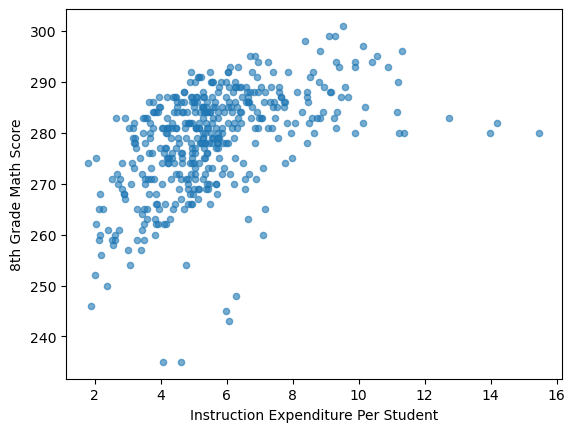

In [17]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure Per Student')
plt.ylabel('8th Grade Math Score')

Text(0, 0.5, '8th Grade Math Score')

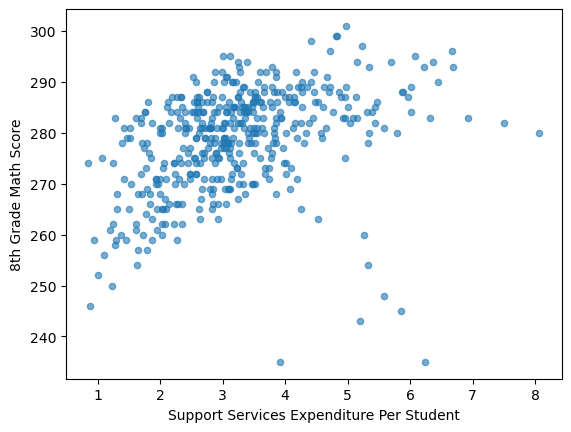

In [18]:
df.plot.scatter(x='SUPPORT_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Support Services Expenditure Per Student')
plt.ylabel('8th Grade Math Score')

It seems that Instrution expenditure per student and support services expenditure per student has postive relationship with 8th Grade Math Score.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df[["INSTRUCTION_EXPENDITURE_PER_STUDENT", "SUPPORT_EXPENDITURE_PER_STUDENT"]].dropna()
y =  df.loc[X.index]["AVG_MATH_8_SCORE"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [22]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [23]:
# create your model here
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [26]:
model.score(X_test, y_test)

0.309774277727374

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

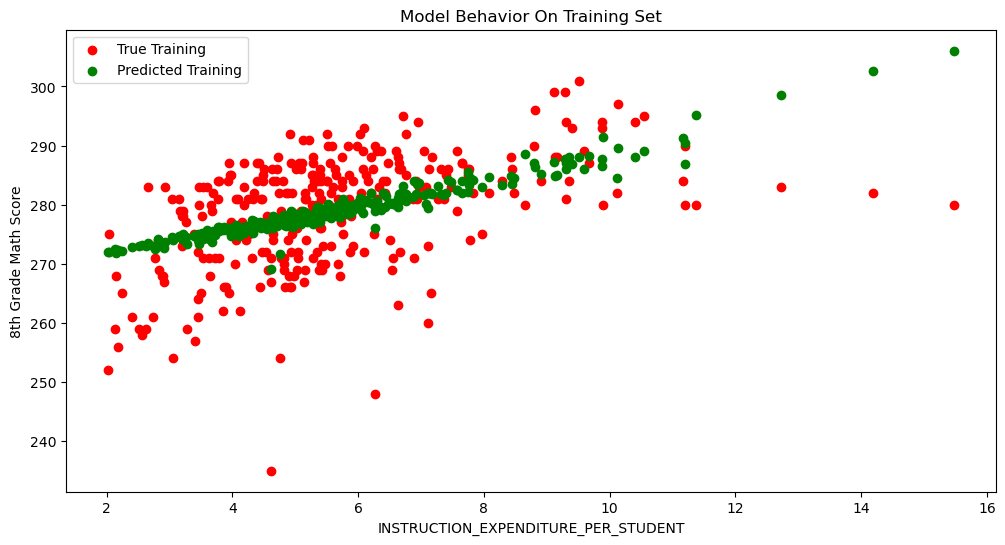

In [27]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Math Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

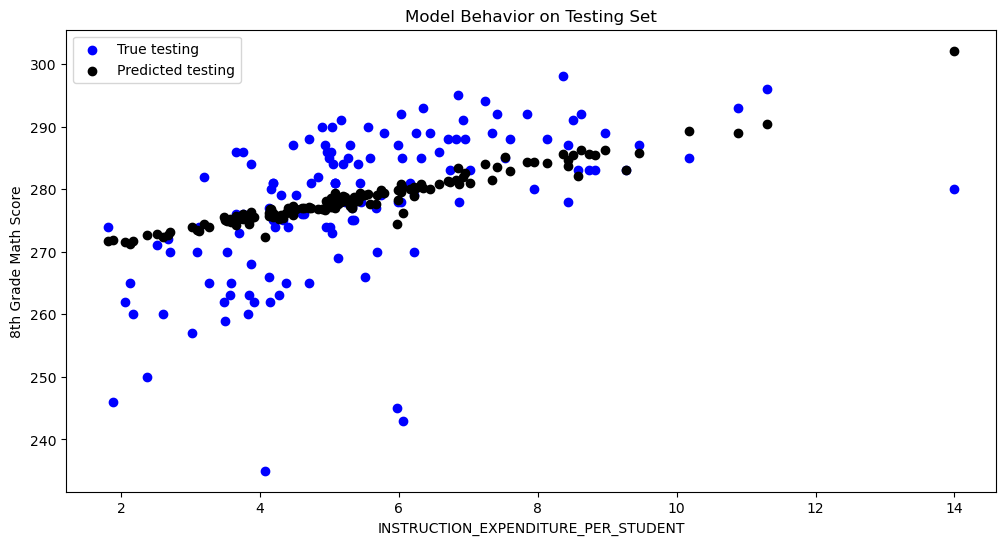

In [28]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Math Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**